In [1]:
# Instalar las dependencias necesarias
!pip install ultralytics  # Instala la biblioteca Ultralytics para YOLOv8
!pip install torch torchvision  # Instala PyTorch si no está instalado

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.5/913.5 kB 58.0 MB/s eta 0:00:00


In [2]:
from google.colab import files

# Cargar el archivo ZIP
uploaded = files.upload()

Saving images_train.zip to images_train.zip
Saving images_val.zip to images_val.zip
Saving labels_test.zip to labels_test.zip
Saving labels_train.zip to labels_train.zip
Saving labels_val.zip to labels_val.zip
Saving images_test.zip to images_test.zip


In [3]:
import zipfile
import os

# Ruta base para los archivos en /content
base_dir = '/content'

# Definir la estructura deseada
structure = {
    'train': {
        'images': 'images_train.zip',
        'labels': 'labels_train.zip'
    },
    'val': {
        'images': 'images_val.zip',
        'labels': 'labels_val.zip'
    },
    'test': {
        'images': 'images_test.zip',
        'labels': 'labels_test.zip'
    }
}

# Procesar y descomprimir los archivos según la estructura
for folder, files in structure.items():
    # Crear carpeta principal si no existe
    folder_path = os.path.join(base_dir, folder)
    os.makedirs(folder_path, exist_ok=True)

    for subfolder, zip_filename in files.items():
        # Crear subcarpeta dentro de la carpeta principal
        subfolder_path = os.path.join(folder_path, subfolder)
        os.makedirs(subfolder_path, exist_ok=True)

        # Ruta completa del archivo .zip
        zip_path = os.path.join(base_dir, zip_filename)

        # Verificar si el archivo .zip existe
        if os.path.exists(zip_path):
            # Descomprimir el archivo directamente en la subcarpeta
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                for file in zip_ref.namelist():
                    # Comprobar si el elemento es un archivo (no un directorio)
                    if not file.endswith('/'):
                        # Extraer solo el contenido (evitando subcarpetas internas)
                        extracted_path = os.path.join(subfolder_path, os.path.basename(file))
                        with zip_ref.open(file) as source, open(extracted_path, 'wb') as target:
                            target.write(source.read())
                print(f"Descomprimido: {zip_filename} en {subfolder_path}")
        else:
            print(f"Archivo no encontrado: {zip_path}")

Descomprimido: images_train.zip en /content/train/images
Descomprimido: labels_train.zip en /content/train/labels
Descomprimido: images_val.zip en /content/val/images
Descomprimido: labels_val.zip en /content/val/labels
Descomprimido: images_test.zip en /content/test/images
Descomprimido: labels_test.zip en /content/test/labels


In [4]:
# Crear el archivo data.yaml
data_yaml = """
train: /content/train/images
val: /content/val/images
test: /content/test/images

nc: 5  # Número de clases (ajusta según tus clases)

names:
- cells-A6sP
- lumen
- nolumen
- notumor
- tumor
"""

# Guardar el archivo
with open("/content/data.yaml", "w") as f:
    f.write(data_yaml)

print("Archivo data.yaml creado en /content/data.yaml")


Archivo data.yaml creado en /content/data.yaml


In [6]:
from ultralytics import YOLO

# Configuración de entrenamiento
epochs = 30       # Número de épocas
img_size = 640    # Tamaño de las imágenes
batch_size = 16   # Tamaño del batch
device = 0        # GPU a utilizar (Colab proporciona acceso a GPUs)
data_yaml = '/content/data.yaml'  # Ruta al archivo data.yaml

# Cargar el modelo
model = YOLO('yolov8s.pt')

# Entrenar el modelo con hiperparámetros ajustados
model.train(
    data=data_yaml,
    epochs=epochs,
    imgsz=img_size,
    batch=batch_size,
    device=device,
    lr0=0.0002486772424577622, # Tasa de aprendizaje inicial optimizada
    momentum=0.610598920981094, # Momentum optimizado
    weight_decay=0.0002403815644014502,   # Decaimiento del peso optimizado
    warmup_epochs= 4,  #Estabilidad del entrenamiento inicial
    optimizer='AdamW',    # Optimizador utilizado
    verbose=True          # Muestra detalles del entrenamiento
)

print("Entrenamiento completado.")



Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, li

100%|██████████| 5.35M/5.35M [00:00<00:00, 366MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 5314 images, 8 backgrounds, 0 corrupt: 100%|██████████| 5322/5322 [00:03<00:00, 1719.87it/s]

train: WARNING ⚠️ /content/train/images/106_png_jpg.rf.3a611413b640f44920d80c1b6b377bcd.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/106_png_jpg.rf.41d0b720c9a46b8189277f11a37fe92d.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/106_png_jpg.rf.c0e3cc5493d949cb4e448c594c9ce229.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/106_png_jpg.rf.c3e153a450b8ee3ce952588117406445.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/135_png_jpg.rf.202abd7ae544b0e6ada1e8ec3562878f.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/135_png_jpg.rf.6fd50ecf930de39b0abc6ec857c37bad.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/155_png_jpg.rf.451c2b097d6462c535e8d7bd0b070c46.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/train/images/155_png_jpg.rf.ae0f275662b3206aa2fc70ac16064252.jpg: 1 duplicate labels removed


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.1 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/val/labels... 725 images, 1 backgrounds, 0 corrupt: 100%|██████████| 726/726 [00:00<00:00, 850.43it/s]

val: New cache created: /content/val/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: AdamW(lr=0.0002486772424577622, momentum=0.610598920981094) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0002403815644014502), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.11G      1.028      1.378      1.128         98        640: 100%|██████████| 333/333 [02:04<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:11<00:00,  2.03it/s]

                   all        726       5740      0.443      0.469      0.359      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      4.11G     0.9543      1.143      1.078        119        640: 100%|██████████| 333/333 [02:04<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:09<00:00,  2.41it/s]

                   all        726       5740       0.44      0.469      0.402      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      4.03G     0.9333       1.08       1.07        119        640: 100%|██████████| 333/333 [01:58<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.18it/s]

                   all        726       5740      0.433      0.484      0.393      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30       3.9G     0.9206      1.051      1.063         95        640: 100%|██████████| 333/333 [01:58<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.00it/s]

                   all        726       5740      0.449      0.519      0.468      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      4.09G     0.9056      1.024      1.058        118        640: 100%|██████████| 333/333 [01:57<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:09<00:00,  2.54it/s]

                   all        726       5740      0.443      0.478      0.453       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      4.01G     0.8942     0.9879      1.051        166        640: 100%|██████████| 333/333 [01:56<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:09<00:00,  2.54it/s]

                   all        726       5740      0.472      0.535      0.488      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      4.03G     0.8867     0.9655      1.047        138        640: 100%|██████████| 333/333 [01:57<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.81it/s]

                   all        726       5740       0.46       0.52      0.464      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.05G     0.8773     0.9459      1.042        101        640: 100%|██████████| 333/333 [01:57<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.18it/s]

                   all        726       5740      0.464      0.525       0.48      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.01G     0.8695     0.9396       1.04        171        640: 100%|██████████| 333/333 [01:57<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  2.93it/s]

                   all        726       5740      0.501      0.528      0.489      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      4.06G     0.8575     0.9171      1.033        134        640: 100%|██████████| 333/333 [01:55<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:09<00:00,  2.49it/s]

                   all        726       5740      0.504      0.521       0.48      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30       3.9G     0.8558     0.9004       1.03         79        640: 100%|██████████| 333/333 [01:54<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:09<00:00,  2.46it/s]

                   all        726       5740      0.491       0.54       0.51      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      4.04G     0.8473     0.8793      1.027        103        640: 100%|██████████| 333/333 [01:56<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.67it/s]

                   all        726       5740       0.51      0.534      0.505       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         4G     0.8403     0.8653      1.022        100        640: 100%|██████████| 333/333 [01:57<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.08it/s]

                   all        726       5740      0.487      0.538      0.494       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      3.94G     0.8305     0.8493      1.015        118        640: 100%|██████████| 333/333 [01:58<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.15it/s]

                   all        726       5740      0.488      0.502        0.5      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      3.84G       0.83     0.8406      1.016         84        640: 100%|██████████| 333/333 [01:56<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.81it/s]

                   all        726       5740       0.51      0.576      0.529      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.12G     0.8175     0.8212      1.011        139        640: 100%|██████████| 333/333 [01:53<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:09<00:00,  2.37it/s]

                   all        726       5740      0.502      0.561      0.508      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.02G     0.8137     0.8093      1.009        102        640: 100%|██████████| 333/333 [01:54<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:09<00:00,  2.43it/s]

                   all        726       5740      0.516      0.525      0.492       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.03G     0.8068     0.7997      1.007         94        640: 100%|██████████| 333/333 [01:54<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:09<00:00,  2.54it/s]

                   all        726       5740      0.509      0.561      0.515       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      3.92G     0.8054     0.7713      1.003        120        640: 100%|██████████| 333/333 [01:53<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.70it/s]

                   all        726       5740      0.468      0.556      0.498      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.12G     0.7932     0.7585     0.9978         94        640: 100%|██████████| 333/333 [01:56<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.19it/s]

                   all        726       5740      0.508      0.553      0.519      0.394


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      4.06G     0.7606     0.6887     0.9884         68        640: 100%|██████████| 333/333 [01:55<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.16it/s]

                   all        726       5740      0.514      0.546      0.499      0.375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      3.89G     0.7508     0.6629     0.9835         59        640: 100%|██████████| 333/333 [01:54<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:09<00:00,  2.55it/s]

                   all        726       5740      0.495      0.553      0.507      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      3.87G     0.7458     0.6475     0.9797         52        640: 100%|██████████| 333/333 [01:52<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.66it/s]

                   all        726       5740      0.502      0.543      0.495      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30       4.1G     0.7378     0.6302     0.9767         65        640: 100%|██████████| 333/333 [01:52<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:09<00:00,  2.46it/s]

                   all        726       5740      0.499      0.555      0.503      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30       4.1G     0.7281     0.6099     0.9716         67        640: 100%|██████████| 333/333 [01:51<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.78it/s]

                   all        726       5740        0.5      0.549      0.498       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.05G     0.7215     0.5899     0.9685         47        640: 100%|██████████| 333/333 [01:52<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.85it/s]

                   all        726       5740      0.533       0.54      0.505      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      3.89G     0.7184     0.5721     0.9652         73        640: 100%|██████████| 333/333 [01:53<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:07<00:00,  3.26it/s]

                   all        726       5740      0.531      0.506      0.502      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      4.09G     0.7111     0.5589     0.9652         60        640: 100%|██████████| 333/333 [01:52<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.63it/s]

                   all        726       5740      0.557      0.501      0.502      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      4.05G     0.7021     0.5444     0.9589         61        640: 100%|██████████| 333/333 [01:52<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:08<00:00,  2.59it/s]

                   all        726       5740      0.524      0.519      0.495      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.91G     0.7029     0.5373     0.9597         61        640: 100%|██████████| 333/333 [01:52<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:09<00:00,  2.42it/s]

                   all        726       5740      0.521      0.519      0.494      0.372



30 epochs completed in 1.047 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 22.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:10<00:00,  2.13it/s]


                   all        726       5740      0.509      0.574      0.529      0.399
                 lumen        136        162      0.498      0.685      0.611      0.474
               nolumen        217        298      0.545      0.446      0.452      0.322
               notumor        174        312      0.392      0.308      0.285      0.206
                 tumor        676       4968      0.603      0.858      0.767      0.593
Speed: 0.2ms preprocess, 4.8ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train2
Entrenamiento completado.


In [7]:
metrics = model.val()

Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/val/labels.cache... 725 images, 1 backgrounds, 0 corrupt: 100%|██████████| 726/726 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 46/46 [00:13<00:00,  3.45it/s]


                   all        726       5740       0.51      0.575      0.529      0.399
                 lumen        136        162        0.5      0.685      0.612      0.474
               nolumen        217        298      0.546      0.448      0.451      0.321
               notumor        174        312      0.393       0.31      0.285      0.205
                 tumor        676       4968      0.602      0.859      0.767      0.593
Speed: 0.4ms preprocess, 9.6ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train22



image 1/1 /content/test/images/115_png_jpg.rf.1483e87668bc090205a0207ba57ed277.jpg: 640x640 1 lumen, 1 nolumen, 5 tumors, 16.2ms
Speed: 2.4ms preprocess, 16.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
Predicción completada. Resultado guardado en: runs/detect/predict/115_png_jpg.rf.1483e87668bc090205a0207ba57ed277.jpg


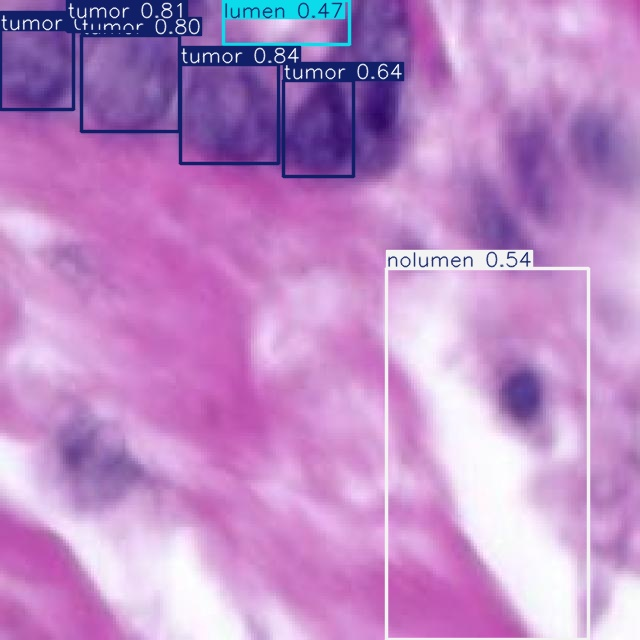

In [18]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# Cargar el modelo entrenado
model = YOLO('runs/detect/train2/weights/best.pt')  # Cambia esta ruta al modelo entrenado

# Ruta de la imagen de prueba
test_image_path = '/content/test/images/115_png_jpg.rf.1483e87668bc090205a0207ba57ed277.jpg'

# Realizar predicción y guardar el resultado
results = model.predict(source=test_image_path, save=True)  # Guarda automáticamente los resultados en runs/detect/predict

# Obtener la ruta de la imagen procesada
result_dir = "runs/detect/predict"  # Carpeta predeterminada donde se guardan los resultados
result_image_path = os.path.join(result_dir, os.path.basename(test_image_path))  # Ruta del archivo procesado

# Mostrar información de predicción
print(f"Predicción completada. Resultado guardado en: {result_image_path}")

# Mostrar la imagen procesada
display(Image(filename=result_image_path))

In [19]:

import shutil

# Definir la ruta de la carpeta en Google Colab
source_folder = "/content/runs"

# Nombre del archivo zip de salida
zip_name = "/content/YOLO8Hipers.zip"

# Crear el archivo zip de la carpeta "/content"
shutil.make_archive(base_name=zip_name.replace(".zip", ""), format='zip', root_dir=source_folder)

# Descargar el archivo zip
from google.colab import files
files.download(zip_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>